## <b>HIERARCHICAL CLUSTERING</b>

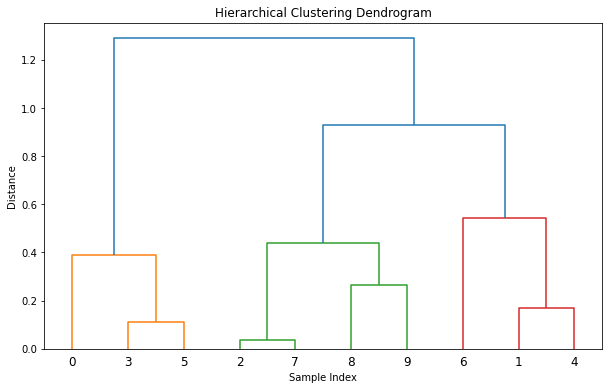

In [22]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def hierarchical_clustering(data, method='single', metric='euclidean'):
    linkage_matrix = linkage(data, method=method, metric=metric)
    return linkage_matrix

def plot_dendrogram(linkage_matrix):
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

if __name__ == "__main__":
    np.random.seed(42)
    n_samples = 10
    n_features = 2
    data = np.random.rand(n_samples, n_features)

    linkage_matrix = hierarchical_clustering(data, method='ward', metric='euclidean')
    plot_dendrogram(linkage_matrix)


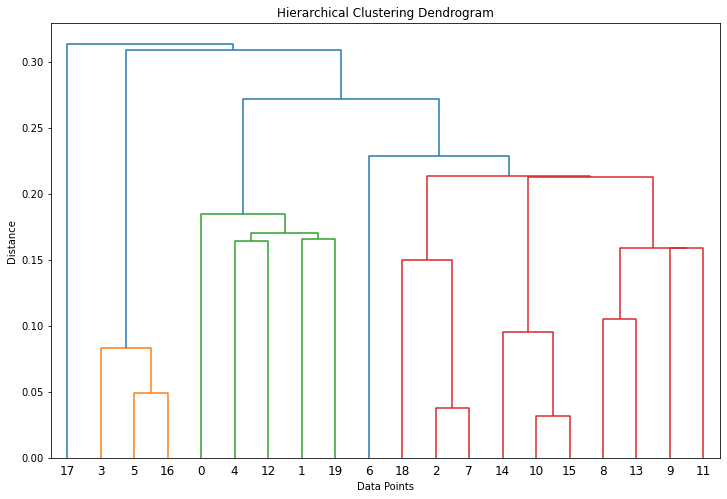

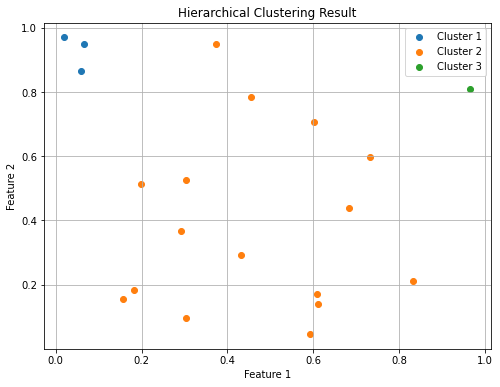

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def hierarchical_clustering(data, linkage_method='single'):
    data = np.array(data)
    Z = linkage(data, method=linkage_method)
    
    return Z

def visualize_dendrogram(Z, labels=None):
    plt.figure(figsize=(12, 8))
    dendrogram(Z, labels=labels)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

def cut_tree(Z, num_clusters):
    return fcluster(Z, num_clusters, criterion='maxclust')

def visualize_clusters(data, clusters, centroids=None):
    plt.figure(figsize=(8, 6))
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Cluster Centroids')
    
    for cluster_id in np.unique(clusters):
        cluster_data = data[clusters == cluster_id]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}")
        
    plt.title("Hierarchical Clustering Result")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

np.random.seed(42)
num_points = 20
data = np.random.rand(num_points, 2)

Z = hierarchical_clustering(data, linkage_method='single')
visualize_dendrogram(Z)
num_clusters = 3
clusters = cut_tree(Z, num_clusters)
visualize_clusters(data, clusters)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def euclidean_dist(a, b):
    return np.linalg.norm(a - b)

def single_linkage_dist(cluster_one, cluster_two):
    min_dist = float('inf')
    for pt_one in cluster_one:
        for pt_two in cluster_two:
            dist = euclidean_dist(pt_one, pt_two)
            if dist < min_dist:
                min_dist = dist
    return min_dist

def complete_linkage_dist(cluster_one, cluster_two):
    max_dist = 0.0
    for pt_one in cluster_one:
        for pt_two in cluster_two:
            dist = euclidean_dist(pt_one, pt_two)
            if dist > max_dist:
                max_dist = dist
    return max_dist

def average_linkage_dist(cluster_one, cluster_two):
    total_dist = 0.0
    for pt_one in cluster_one:
        for pt_two in cluster_two:
            total_dist += euclidean_dist(pt_one, pt_two)
    return total_dist / (len(cluster_one) * len(cluster_two))

def ward_linkage_dist(cluster_one, cluster_two):
    mean_cluster_one = np.mean(cluster_one, axis=0)
    mean_cluster_two = np.mean(cluster_two, axis=0)
    return euclidean_dist(mean_cluster_one, mean_cluster_two)

def calculate_dist_matrix(data, linkage_method):
    n_samples = len(data)
    dist_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            if linkage_method == 'single':
                dist_matrix[i, j] = single_linkage_dist(data[i], data[j])
            elif linkage_method == 'complete':
                dist_matrix[i, j] = complete_linkage_dist(data[i], data[j])
            elif linkage_method == 'average':
                dist_matrix[i, j] = average_linkage_dist(data[i], data[j])
            elif linkage_method == 'ward':
                dist_matrix[i, j] = ward_linkage_dist(data[i], data[j])

    dist_matrix += dist_matrix.T
    return dist_matrix

def hierarchical_clustering(data, linkage_method):
    n_samples = len(data)
    dist_matrix = calculate_dist_matrix(data, linkage_method)

    # Initialize clusters, each containing a single sample
    clusters = [[i] for i in range(n_samples)]
    active_indices = list(range(n_samples))

    while len(active_indices) > 1:
        min_dist = float('inf')
        merge_indices = (0, 0)

        for i in range(len(active_indices) - 1):
            for j in range(i + 1, len(active_indices)):
                if min_dist > dist_matrix[active_indices[i], active_indices[j]]:
                    min_dist = dist_matrix[active_indices[i], active_indices[j]]
                    merge_indices = (i, j)

        i, j = merge_indices
        clusters[active_indices[i]].extend(clusters[active_indices[j]])
        del clusters[active_indices[j]]

        active_indices.remove(active_indices[j])

        dist_matrix = np.delete(dist_matrix, j, axis=0)
        dist_matrix = np.delete(dist_matrix, j, axis=1)
        new_row = np.array([dist_matrix[active_indices[i], active_indices[i]] for i in range(len(active_indices))])
        dist_matrix[active_indices[i]] = new_row
        dist_matrix[:, active_indices[i]] = new_row

    if len(clusters) == 1:
        linkage_matrix = np.array(clusters[0], dtype=float).reshape((1, n_samples))
    else:
        linkage_matrix = dist_matrix

    return linkage_matrix

def plot_dendrogram(linkage_matrix):
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix.T)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

if __name__ == "__main__":
    np.random.seed(42)
    n_samples = 10
    n_features = 2
    data = np.random.rand(n_samples, n_features)
    linkage_matrix = hierarchical_clustering(data, 'ward')
    plot_dendrogram(linkage_matrix)

IndexError: index 9 is out of bounds for axis 0 with size 9